<a href="https://colab.research.google.com/github/shakasom/GDS/blob/master/GDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Population Under Age of 5 & Preschools in Sweden

Sweden is considered as third busiest baby-makers in Europe according to recent statistics from Eurostat. In this project, we will analyse the Geographic distribution of the population under the age of 5 as well ass the distribution of preschools.

## Installation & Data

In [0]:

%%time 

# Install GDAL and Geopandas
!apt install gdal-bin python-gdal python3-gdal --quiet
!apt install python3-rtree --quiet
!pip install git+git://github.com/geopandas/geopandas.git --quiet
!pip install descartes --quiet

# Install geovisualization libraries
!pip install folium  --quiet
!pip install plotly_express  --quiet
!pip install mapclassify --quiet

# Install Pysal - Spatial Statistics
!pip install pysal --quiet
!pip install splot --quiet

In [0]:
# Importing libraries
import pandas as pd 
import numpy as np
import geopandas as gpd
import fiona


import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import folium 
import plotly
import plotly_express as px

from libpysal.weights.contiguity import Queen
from esda.moran import Moran
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
from splot.esda import lisa_cluster
from pysal.explore import esda
from pysal.lib import weights
import pysal as ps

In [0]:
# Get the data
!wget https://www.dropbox.com/s/19e36jawrr073hl/dataset.zip

In [0]:
# Unzip data
!unzip dataset.zip

## Exploratory Data Analysis 

### Population Dataset

In [5]:

population = gpd.read_file("dataset/pop_statistics.shp")

population.head()

,Deso,Age0_5,Age6_9,Age10_15,Age16_19,Age20_24,Age25_29,Age30_34,Age35_39,Age40_44,Age45_49,Age50_54,Age55_59,Age60_64,Age65_69,Age70_74,Age75_79,Age80_w,Tot_pop,SW_bakgr,NSW_bakgr,Median_Inc,U_median,O_median,Tot20_pop,HH_Child,HH_NoChild,Single_Chi,Single_NoC,Others,Totalt_3,geometry
0,0115A0040,113,80,108,68,75,73,98,82,93,120,126,112,102,71,60,39,23,1443,1180,263,306746,480,615,1095,187,126,50,121,58,542,"POLYGON ((690301.5032014149 6614909.753872125,..."
1,0136A0010,37,35,40,24,32,32,25,30,45,41,53,51,67,67,80,54,25,738,640,98,284119,303,315,618,62,113,21,120,25,341,"POLYGON ((688731.6263021695 6547758.133096275,..."
2,0188A0150,71,46,59,59,55,55,48,57,52,68,103,109,94,95,114,55,80,1220,1054,166,257476,548,456,1004,110,173,36,214,37,570,"POLYGON ((699545.556589984 6645614.544192226, ..."
3,0188A0130,62,39,63,59,38,63,50,53,48,55,76,86,106,109,135,108,72,1222,1103,119,256550,578,434,1012,105,196,24,215,39,579,"POLYGON ((744992.2798033284 6636197.581432475,..."
4,0188A0060,91,81,105,83,67,71,86,85,88,118,166,173,176,193,245,159,115,2102,1894,208,268933,924,816,1740,182,388,54,321,47,992,"POLYGON ((755220.7303435885 6620631.9094135, 7..."


In [6]:
population.shape

(5985, 32)

In [7]:
columns = ['Deso',	'Age0_5', 'Tot_pop', 'SW_bakgr',
            'NSW_bakgr', 'Median_Inc', 	'U_median',	
            'O_median','HH_Child',	'HH_NoChild',	
            'Single_Chi',	'Single_NoC',	'Others', 'geometry']
population = population[columns]
population.head()

,Deso,Age0_5,Tot_pop,SW_bakgr,NSW_bakgr,Median_Inc,U_median,O_median,HH_Child,HH_NoChild,Single_Chi,Single_NoC,Others,geometry
0,0115A0040,113,1443,1180,263,306746,480,615,187,126,50,121,58,"POLYGON ((690301.5032014149 6614909.753872125,..."
1,0136A0010,37,738,640,98,284119,303,315,62,113,21,120,25,"POLYGON ((688731.6263021695 6547758.133096275,..."
2,0188A0150,71,1220,1054,166,257476,548,456,110,173,36,214,37,"POLYGON ((699545.556589984 6645614.544192226, ..."
3,0188A0130,62,1222,1103,119,256550,578,434,105,196,24,215,39,"POLYGON ((744992.2798033284 6636197.581432475,..."
4,0188A0060,91,2102,1894,208,268933,924,816,182,388,54,321,47,"POLYGON ((755220.7303435885 6620631.9094135, 7..."


In [8]:
population.shape

(5985, 14)

In [9]:
population.describe()

,Age0_5,Tot_pop,SW_bakgr,NSW_bakgr,Median_Inc,U_median,O_median,HH_Child,HH_NoChild,Single_Chi,Single_NoC,Others
count,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000
mean,121.401671,1706.960067,1283.245614,423.713617,285435.133333,647.952047,649.822222,174.049958,187.463158,55.301921,307.431746,53.929490
std,54.816171,440.420592,424.956486,383.164418,61541.401238,236.176029,219.424887,75.320552,66.046965,26.740170,178.087220,35.170047
min,0.000000,654.000000,62.000000,21.000000,3012.000000,80.000000,16.000000,0.000000,22.000000,0.000000,19.000000,0.000000
25%,84.000000,1396.000000,1011.000000,171.000000,248679.000000,472.000000,487.000000,119.000000,142.000000,35.000000,167.000000,30.000000
50%,112.000000,1694.000000,1276.000000,298.000000,284589.000000,617.000000,639.000000,160.000000,181.000000,51.000000,271.000000,45.000000
75%,148.000000,2001.000000,1560.000000,519.000000,320832.000000,791.000000,795.000000,218.000000,227.000000,70.000000,419.000000,68.000000
max,541.000000,4243.000000,3036.000000,2735.000000,562797.000000,2003.000000,1798.000000,550.000000,673.000000,183.000000,1523.000000,412.000000


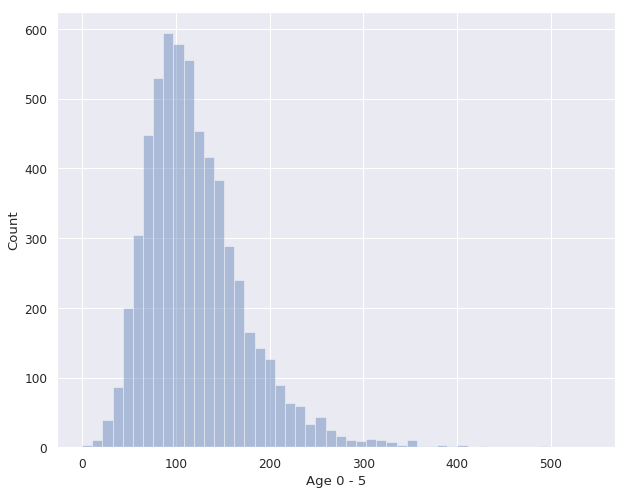

In [10]:
sns.set(style='darkgrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 8]})
sns.distplot(population['Age0_5'], norm_hist=False, kde=False).set(xlabel='Age 0 - 5', ylabel='Count');
plt.savefig('age0-5_distplot.png')

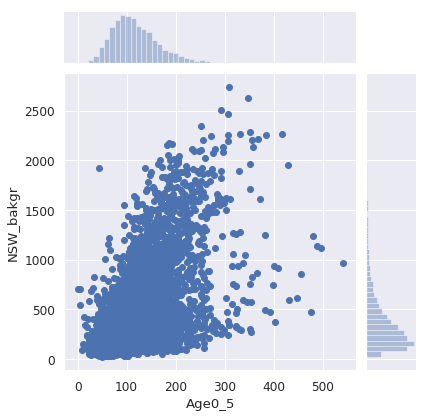

In [11]:
sns.jointplot(x=population['Age0_5'], y=population['NSW_bakgr']);

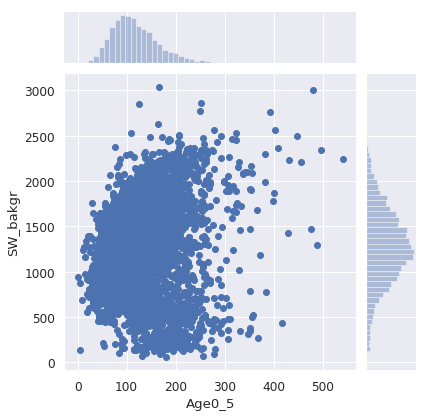

In [12]:
sns.jointplot(x=population['Age0_5'], y=population['SW_bakgr']);

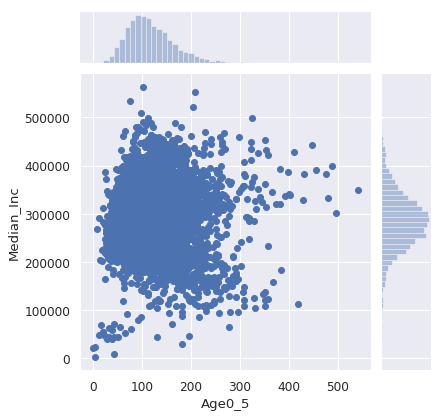

In [13]:

sns.jointplot(x=population['Age0_5'], y=population['Median_Inc']);

In [0]:
sns.set(style='white', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 8]})

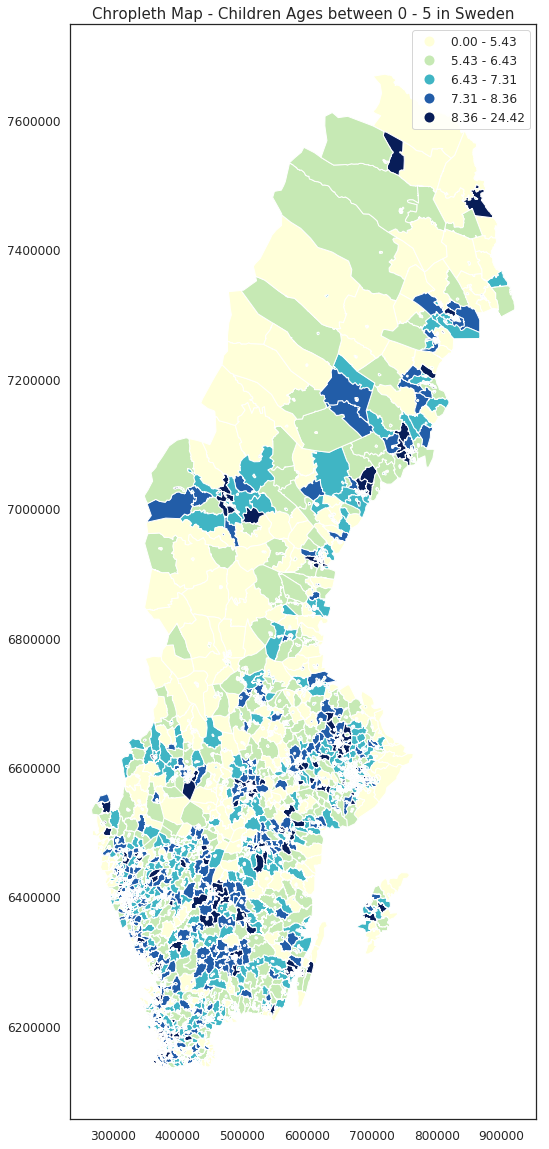

In [15]:
population['Age05_density'] = population['Age0_5'] / population['Tot_pop'] * 100
fig, ax = plt.subplots(figsize=(18,16))
population.plot(column='Age05_density', scheme='Quantiles', k=5, cmap='YlGnBu', legend=True, ax=ax);
plt.tight_layout()
plt.title('Chropleth Map - Children Ages between 0 - 5 in Sweden', fontsize= 15,  y=0.5)
plt.savefig('choroplethmap.png', bbox_inches="tight")
plt.show()

### Preschools dataset

In [16]:
preschools = gpd.read_file("dataset/preschools.shp")
preschools.head()

,Name,FIRMABEN,Address,City,POSTORT,POSTNUMMER,POSTADRESS,KOM,KOMTEXT,geometry
0,LIDINGÖ MONTESSORIFÖRSKOLA EKONOMISK FÖRENING,None,HOLMIAVÄGEN 8,LIDINGÖ,LIDINGÖ,18131,HOLMIAVÄGEN 8,186,Lidingö,POINT (678249 6585136)
1,EKERÖ PASTORAT,PASTORSEXPEDITION OCH KYRKANS FÖRSKOLA,BJÖRKUDDSVÄGEN 2,EKERÖ,EKERÖ,17822,BOX 116,125,Ekerö,POINT (659668 6575276)
2,BANKERYDS MISSIONSFÖRSAMLING,None,EKEFORSVÄGEN 22,BANKERYD,BANKERYD,56433,EKEFORSVÄGEN 22,680,Jönköping,POINT (447950 6412884)
3,PINGSTLILJANS FÖRSKOLA I TENHULT AB,None,VÄSTRA VÄGEN 2 B,TENHULT,TENHULT,56029,VÄSTRA VÄGEN 2,680,Jönköping,POINT (459569 6396416)
4,SOLSTRÅLENS FÖRSKOLA,None,ÅNARYD 26,GRÄNNA,GRÄNNA,56393,ÅNARYD 26,680,Jönköping,POINT (464770 6422324)


In [17]:
preschools.shape

(9599, 10)

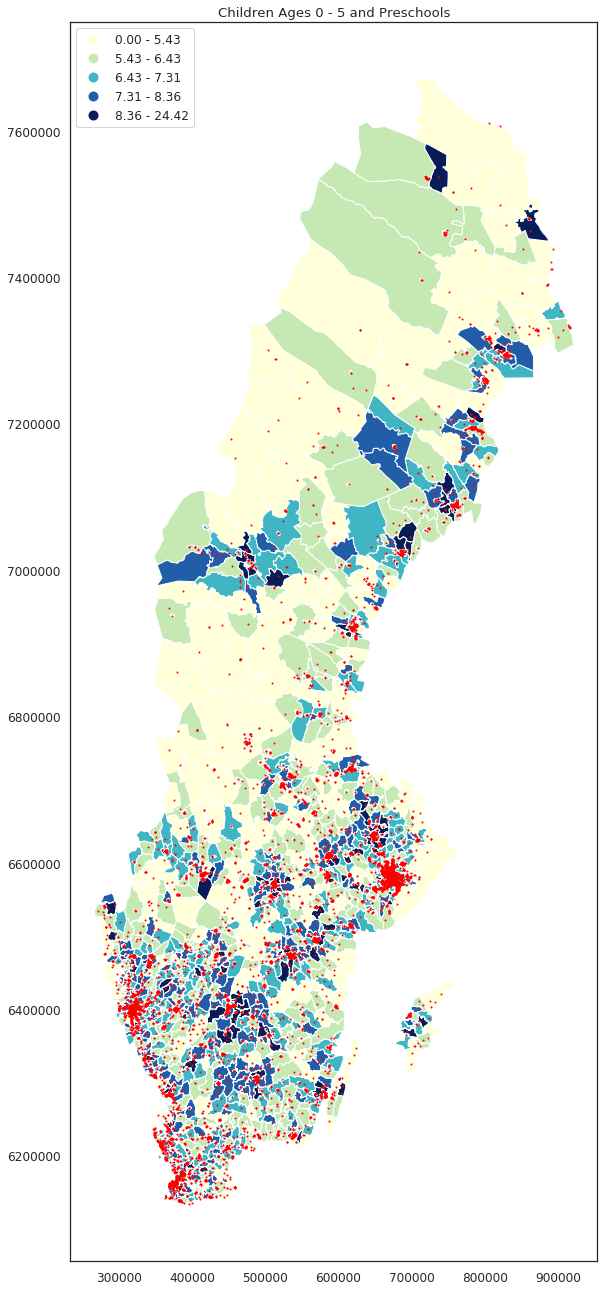

In [18]:
fig, ax = plt.subplots(figsize=(22,18))
population.plot(column='Age05_density', scheme='Quantiles', k=5, cmap='YlGnBu', legend=True, ax=ax);
preschools.plot(ax=ax, color='red', markersize=1)
plt.tight_layout()
#ax.set_axis_off()
plt.title('Children Ages 0 - 5 and Preschools')
plt.savefig('choroplethmap_and_preschools.png', bbox_inches="tight")
plt.show()

In [19]:
preschools.crs, population.crs

({'init': 'epsg:3006'}, {'init': 'epsg:3006'})

## Spatial Join

Count number of preschools within each area. The process contains the following:

* Contains: Use spatial join to determine which preschools within the polygon area.
* Group by size to the aggregate number of preschools in each area
* Merge the group by dataframe with population dataset.

In [20]:

# Points in Polygon
pop_within_schools = gpd.sjoin(population,preschools, op='contains' )
pop_within_schools.head()

,Deso,Age0_5,Tot_pop,SW_bakgr,NSW_bakgr,Median_Inc,U_median,O_median,HH_Child,HH_NoChild,Single_Chi,Single_NoC,Others,geometry,Age05_density,index_right,Name,FIRMABEN,Address,City,POSTORT,POSTNUMMER,POSTADRESS,KOM,KOMTEXT
1,0136A0010,37,738,640,98,284119,303,315,62,113,21,120,25,"POLYGON ((688731.6263021695 6547758.133096275,...",5.013550,789,HANINGE KOMMUN,MUSKÖ SKOLA OCH FÖRSKOLA,ARBOTTNAVÄGEN 1,MUSKÖ,HANINGE,13681,None,136,Haninge
2,0188A0150,71,1220,1054,166,257476,548,456,110,173,36,214,37,"POLYGON ((699545.556589984 6645614.544192226, ...",5.819672,4993,NORRTÄLJE KOMMUN,EDSBRO FÖRSKOLA,BROKULLAVÄGEN 2,EDSBRO,EDSBRO,76297,SKOLVÄGEN 2,188,Norrtälje
3,0188A0130,62,1222,1103,119,256550,578,434,105,196,24,215,39,"POLYGON ((744992.2798033284 6636197.581432475,...",5.073650,821,NORRTÄLJE KOMMUN,"VÄTÖ SKOLA, FRITIDSHEM OCH FÖRSKOLA",HÅKNÄSVÄGEN 6,VÄTÖ,VÄTÖ,76021,HARG,188,Norrtälje
4,0188A0060,91,2102,1894,208,268933,924,816,182,388,54,321,47,"POLYGON ((755220.7303435885 6620631.9094135, 7...",4.329210,6977,VIKTORIAGÅRDEN FÖRSKOLA EKONOMISK FÖRENING,None,GRÄDDÖ BYVÄG 6,GRÄDDÖ,GRÄDDÖ,76015,GRÄDDÖ BYVÄG 6,188,Norrtälje
4,0188A0060,91,2102,1894,208,268933,924,816,182,388,54,321,47,"POLYGON ((755220.7303435885 6620631.9094135, 7...",4.329210,8648,VIKTORIAGÅRDEN FÖRSKOLA AB,None,GRÄDDÖ BYVÄG 6,GRÄDDÖ,GRÄDDÖ,76015,GRÄDDÖ BYVÄG 6,188,Norrtälje


In [21]:
pop_within_schools.shape

(9599, 25)

In [22]:
# Groupby 
grouped_pop = pop_within_schools.groupby('Deso').size()
grouped_pop.head()

Deso
0114C1030    3
0114C1040    1
0114C1050    4
0114C1060    1
0114C1070    1
dtype: int64

In [23]:
grouped_pop.shape, population.shape

((4776,), (5985, 15))

In [24]:
 population.shape[0] - grouped_pop.shape[0]

1209

In [25]:
# Create datafrom from grouped_pop
df = grouped_pop.to_frame().reset_index()
df.columns = ['Deso', 'preschool_count']
df.head()

,Deso,preschool_count
0,0114C1030,3
1,0114C1040,1
2,0114C1050,4
3,0114C1060,1
4,0114C1070,1


In [26]:
# Merge df and population: outer join to include other dropped rows from grouped_pop
merged_population = population.merge(df, on='Deso', how='outer')
merged_population.head()

,Deso,Age0_5,Tot_pop,SW_bakgr,NSW_bakgr,Median_Inc,U_median,O_median,HH_Child,HH_NoChild,Single_Chi,Single_NoC,Others,geometry,Age05_density,preschool_count
0,0115A0040,113,1443,1180,263,306746,480,615,187,126,50,121,58,"POLYGON ((690301.5032014149 6614909.753872125,...",7.830908,NaN
1,0136A0010,37,738,640,98,284119,303,315,62,113,21,120,25,"POLYGON ((688731.6263021695 6547758.133096275,...",5.013550,1.0
2,0188A0150,71,1220,1054,166,257476,548,456,110,173,36,214,37,"POLYGON ((699545.556589984 6645614.544192226, ...",5.819672,1.0
3,0188A0130,62,1222,1103,119,256550,578,434,105,196,24,215,39,"POLYGON ((744992.2798033284 6636197.581432475,...",5.073650,1.0
4,0188A0060,91,2102,1894,208,268933,924,816,182,388,54,321,47,"POLYGON ((755220.7303435885 6620631.9094135, 7...",4.329210,2.0


In [27]:
# Merged_population has the original population size
merged_population.shape

(5985, 16)

In [0]:
# Those areas with no preschools have NaN values. Fill it with 0
merged_population['preschool_count'].fillna(0,inplace=True)
merged_population['preschool_count'] = merged_population['preschool_count'].astype(int)

In [29]:
merged_population.head()

,Deso,Age0_5,Tot_pop,SW_bakgr,NSW_bakgr,Median_Inc,U_median,O_median,HH_Child,HH_NoChild,Single_Chi,Single_NoC,Others,geometry,Age05_density,preschool_count
0,0115A0040,113,1443,1180,263,306746,480,615,187,126,50,121,58,"POLYGON ((690301.5032014149 6614909.753872125,...",7.830908,0
1,0136A0010,37,738,640,98,284119,303,315,62,113,21,120,25,"POLYGON ((688731.6263021695 6547758.133096275,...",5.013550,1
2,0188A0150,71,1220,1054,166,257476,548,456,110,173,36,214,37,"POLYGON ((699545.556589984 6645614.544192226, ...",5.819672,1
3,0188A0130,62,1222,1103,119,256550,578,434,105,196,24,215,39,"POLYGON ((744992.2798033284 6636197.581432475,...",5.073650,1
4,0188A0060,91,2102,1894,208,268933,924,816,182,388,54,321,47,"POLYGON ((755220.7303435885 6620631.9094135, 7...",4.329210,2


In [30]:
columns = ['Deso',	'Age0_5', 'Tot_pop', 'SW_bakgr',
            'NSW_bakgr', 'Median_Inc', 	'U_median',	
            'O_median','HH_Child',	'HH_NoChild',	
            'Single_Chi',	'Single_NoC',	'Others', 'Age05_density', 'preschool_count','geometry']

merged_population[columns].head()

,Deso,Age0_5,Tot_pop,SW_bakgr,NSW_bakgr,Median_Inc,U_median,O_median,HH_Child,HH_NoChild,Single_Chi,Single_NoC,Others,Age05_density,preschool_count,geometry
0,0115A0040,113,1443,1180,263,306746,480,615,187,126,50,121,58,7.830908,0,"POLYGON ((690301.5032014149 6614909.753872125,..."
1,0136A0010,37,738,640,98,284119,303,315,62,113,21,120,25,5.013550,1,"POLYGON ((688731.6263021695 6547758.133096275,..."
2,0188A0150,71,1220,1054,166,257476,548,456,110,173,36,214,37,5.819672,1,"POLYGON ((699545.556589984 6645614.544192226, ..."
3,0188A0130,62,1222,1103,119,256550,578,434,105,196,24,215,39,5.073650,1,"POLYGON ((744992.2798033284 6636197.581432475,..."
4,0188A0060,91,2102,1894,208,268933,924,816,182,388,54,321,47,4.329210,2,"POLYGON ((755220.7303435885 6620631.9094135, 7..."


In [31]:
merged_population.preschool_count.describe()

count    5985.000000
mean        1.603843
std         1.333176
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: preschool_count, dtype: float64

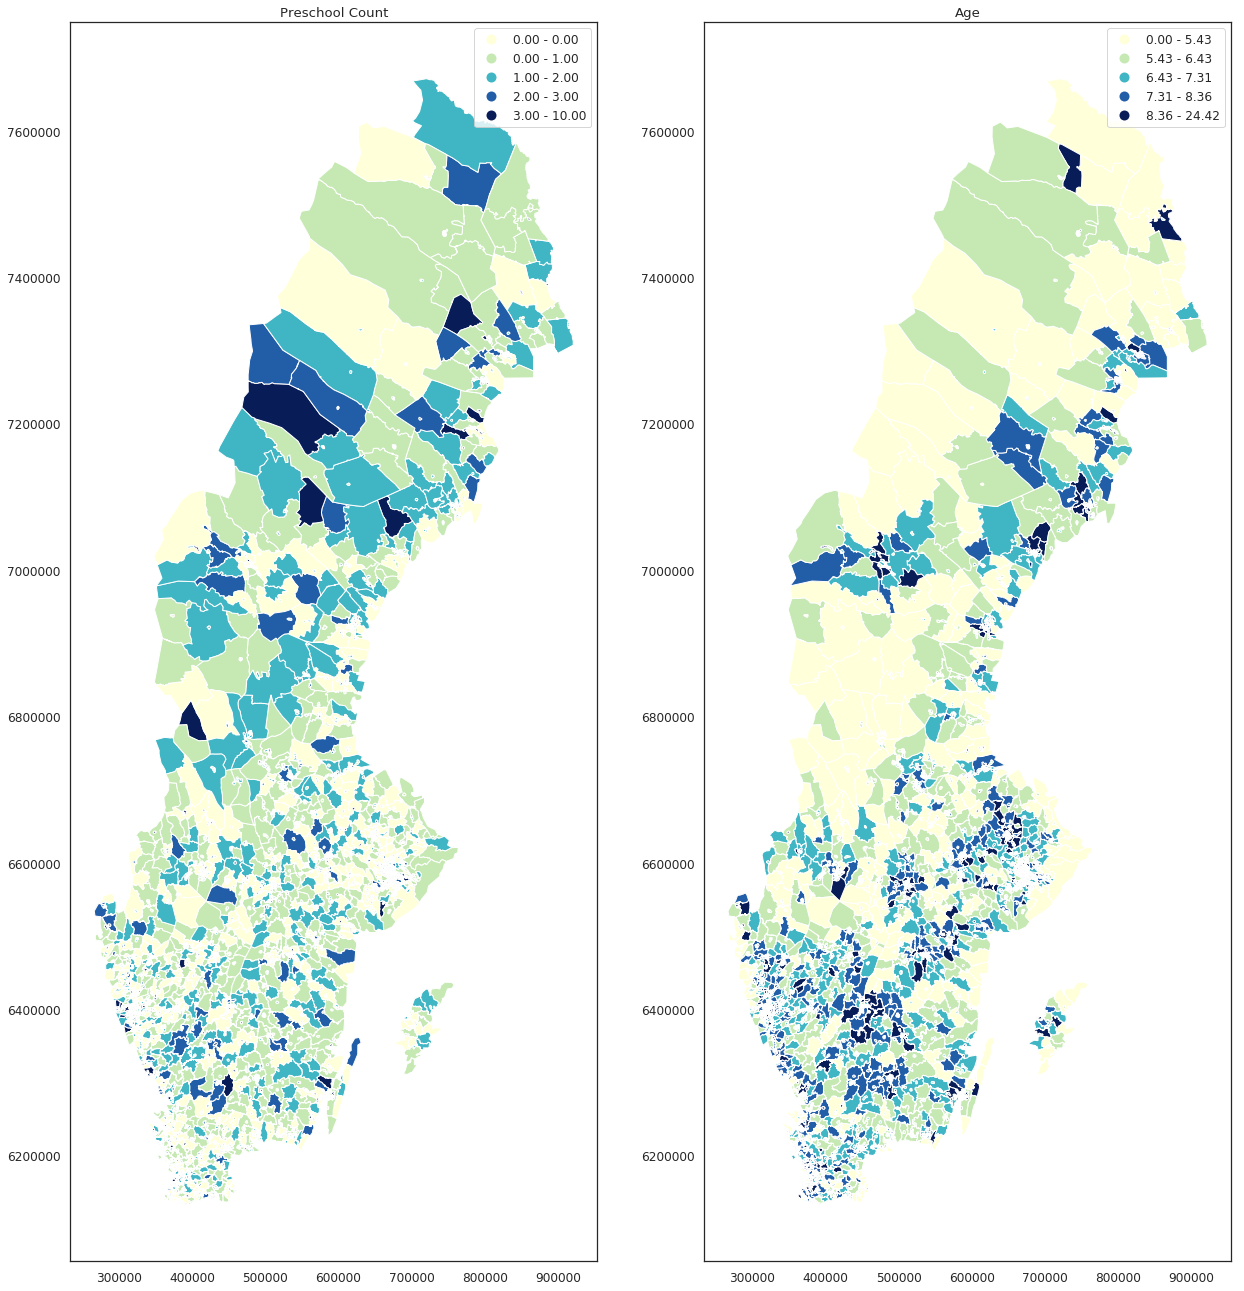

In [32]:
fig, ax = plt.subplots(1,2, figsize=(18,18))
merged_population.plot(column='preschool_count', scheme='Quantiles', k=5, cmap='YlGnBu', legend=True, ax=ax[0]);
merged_population.plot(column='Age05_density', scheme='Quantiles', k=5, cmap='YlGnBu', legend=True, ax=ax[1]);
plt.tight_layout()
ax[0].set_title("Preschool Count")
ax[1].set_title("Age")
plt.savefig('comparison.png', bbox_inches="tight")
plt.show()

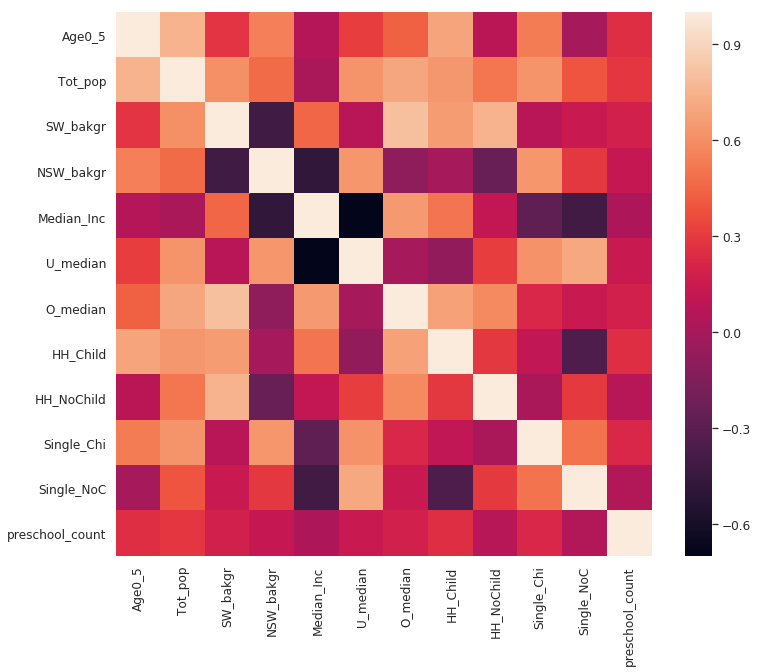

In [35]:
columns = ['Age0_5', 'Tot_pop','SW_bakgr', 'NSW_bakgr', 'Median_Inc', 
           'U_median','O_median', 'HH_Child', 'HH_NoChild', 
           'Single_Chi', 'Single_NoC',  'preschool_count']

# calculate correlation matrix
correlation = merged_population[columns].corr()

fig, ax = plt.subplots(figsize=(12,10))
# plot the heatmap
sns.heatmap(correlation, xticklabels=columns,yticklabels=columns, ax=ax)
plt.show()

In [36]:
counties = gpd.read_file("dataset/ak_riks.shp")
counties.head()

,KOMMUNNAMN,KKOD,KATEGORI,LANSNAMN,KOMMUNKOD,LANSKOD,KOM_KOD,LAN_KOD,ADAT,geometry
0,Emmaboda,414,Kommun,Kalmar län,862,8,0862,08,None,"POLYGON ((525639.084 6277407.25, 525609.911 62..."
1,Vännäs,414,Kommun,Västerbottens län,2460,24,2460,24,1912-12-12 12:00,"POLYGON ((733523.723 7115267.096, 737073.363 7..."
2,Sunne,414,Kommun,Värmlands län,1766,17,1766,17,None,"POLYGON ((387389.622 6658492.993, 387637.222 6..."
3,Habo,414,Kommun,Jönköpings län,643,6,0643,06,None,"POLYGON ((444634.204 6431797.23, 444482.407 64..."
4,Dals-Ed,414,Kommun,Västra Götalands län,1438,14,1438,14,2011-05-10 09:49,"POLYGON ((307634.762 6536745.759, 307641.19 65..."


In [0]:
# Subset two cities
stockholm = counties[counties['KOMMUNNAMN'] == 'Stockholm']
gothenburg = counties[counties['KOMMUNNAMN'] == 'Göteborg']


In [0]:
# Spatial join two cities with population dataset
stockholm_pop = gpd.sjoin(merged_population,stockholm, op='within' )
gothenburg_pop = gpd.sjoin(merged_population,gothenburg, op='within' )


In [0]:

# Create y variable values for stockholm
ys = stockholm_pop['preschool_count'].values

# Get Weights (Queen)
wqs = Queen.from_dataframe(stockholm_pop)
wqs.transform = 'r'

# Sptial lag
ylags = weights.lag_spatial(wqs, ys)
stockholm_pop['ylag'] = ylags

In [0]:
# Create y variable values for gothenburg
yg = gothenburg_pop['preschool_count'].values

# Get Weights (Queen)
wqg = Queen.from_dataframe(gothenburg_pop)
wqg.transform = 'r'

# Sptial lag
ylagg = weights.lag_spatial(wqg, yg)
gothenburg_pop['ylag'] = ylagg

In [0]:
# calculate Moran_Local and plot
moran_loc_s = Moran_Local(ys, wqs)
moran_loc_g = Moran_Local(yg, wqg)


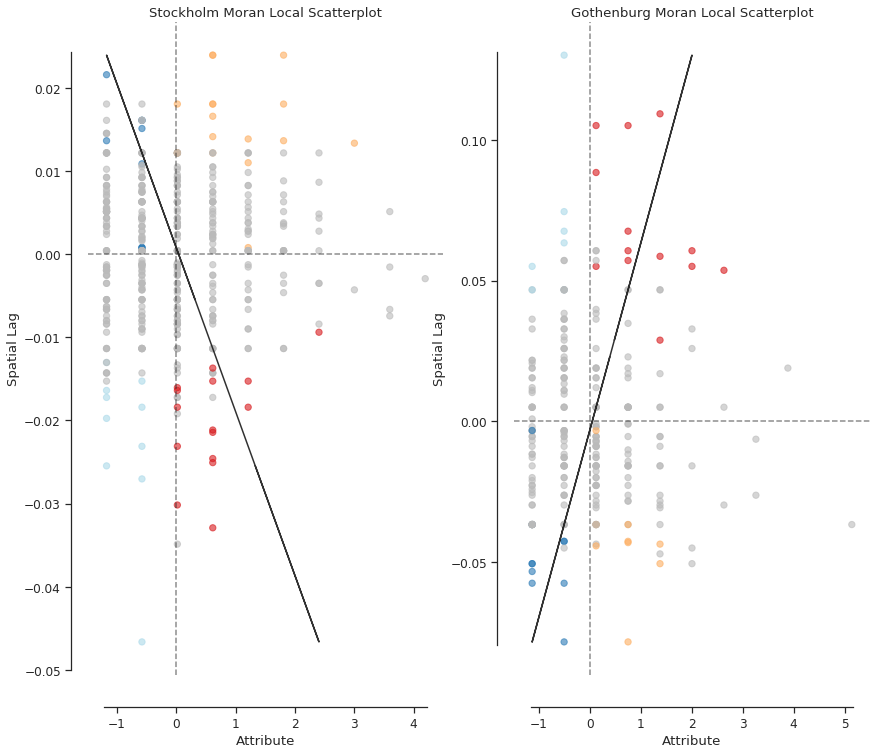

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(14,12))
moran_scatterplot(moran_loc_s, p=0.05, ax= ax[0])
moran_scatterplot(moran_loc_g, p=0.05, ax= ax[1])
ax[0].set_title("Stockholm Moran Local Scatterplot")
ax[1].set_title("Gothenburg Moran Local Scatterplot")
plt.savefig('ml_scatter.png')
plt.show()

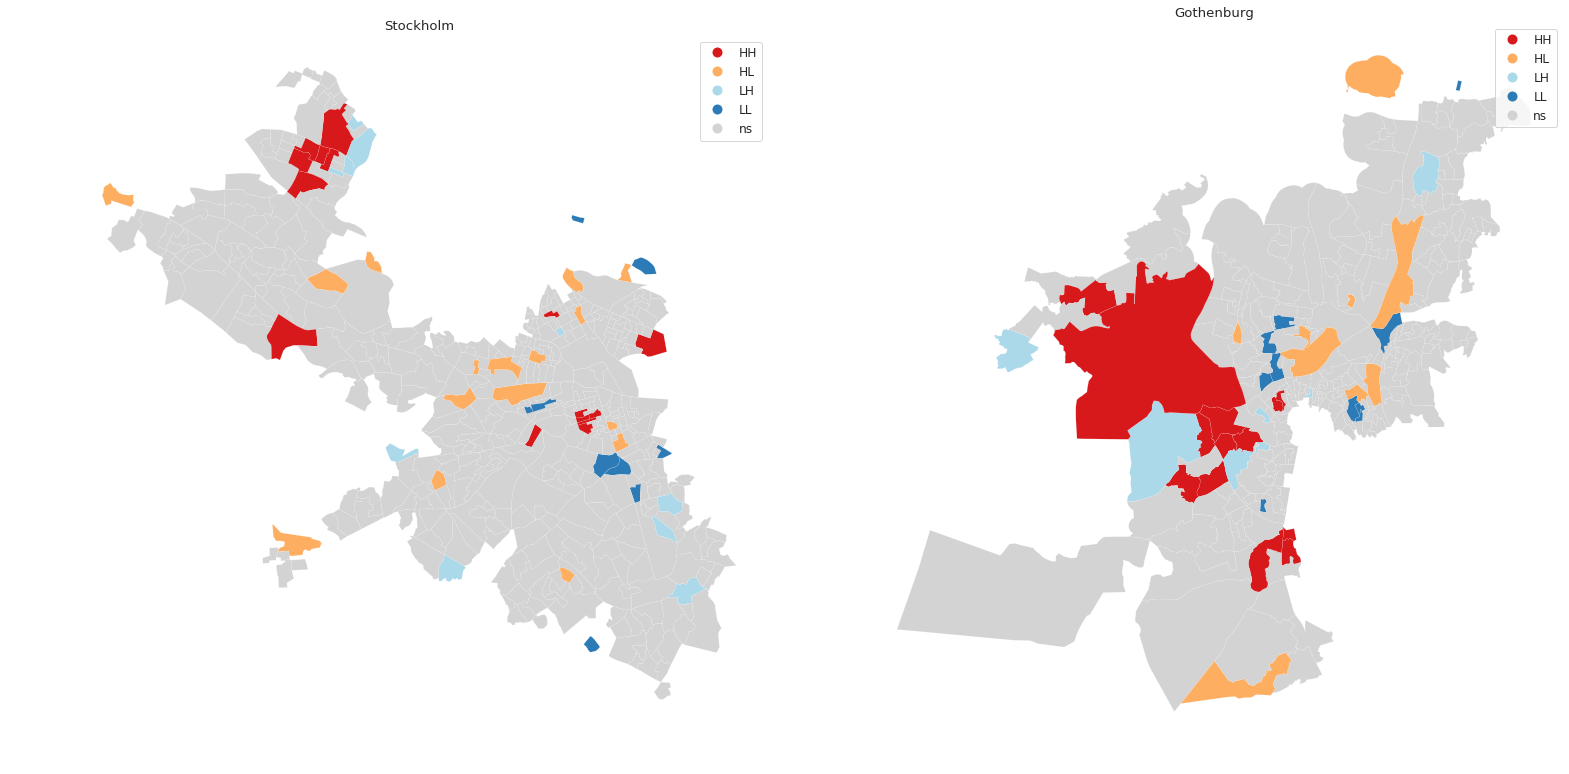

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(22,18))
lisa_cluster(moran_loc_s, stockholm_pop, p=0.05, ax=ax[0])
lisa_cluster(moran_loc_g, gothenburg_pop, p=0.05, ax=ax[1])
ax[0].set_title('Stockholm')
ax[1].set_title('Gothenburg')
plt.tight_layout()
plt.savefig('lisa_clusters.png')
plt.show()

# End